<a href="https://colab.research.google.com/github/lijingwang/DataScienceForGeosciences/blob/main/hw3/Homework3_geochemistry_central_valley.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data Science for the Geosciences, 2022
       
Author: Lijing Wang (lijing52@stanford.edu)


---


# Groundwater geochemistry data in Central Valley

California’s central valley is one of the most productive agricultural regions of the world. Agricultural irrigation in these semi-arid agricultural regions heavily relys on the groundwater system. At the same time, with an increase in population, groundwater consumption is expected to increase. The result is that pumping from increasingly deeper parts of the aquifer has increased the rate of downward groundwater flow. This increasing gradient may enhance the concentration of geogenic contaminants, such as Chromium (Cr), Uranium (U) and Arsenic (As). 


**Landuse map in Central Valley**



![landuse.jpg](https://drive.google.com/uc?export=view&id=1M62JIu9cKtztoxiWIMILUQ3yrkxobtF8)

 

Let's start to explore our dataset: \\
Data source: USGS GAMA Priority Basin Project, acquired in Feb. 2019.

In [1]:
## Clone data from our GitHub repository
! git clone https://github.com/lijingwang/DataScienceForGeosciences.git

Cloning into 'DataScienceForGeosciences'...
remote: Enumerating objects: 645, done.
remote: Counting objects: 100% (30/30), done.
remote: Compressing objects: 100% (27/27), done.
remote: Total 645 (delta 10), reused 9 (delta 3), pack-reused 615
Receiving objects: 100% (645/645), 171.24 MiB | 14.39 MiB/s, done.
Resolving deltas: 100% (330/330), done.
Checking out files: 100% (137/137), done.


In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
warnings.filterwarnings("ignore")

In [3]:
# Load geochem dataset, groundwater chemistry in Central Valley
data = pd.read_csv('/content/DataScienceForGeosciences/hw3/Datapoints-CentralValley-Groundwater-Jan2019.csv')

In [4]:
# preview the data
data.head()

,Latitude,Longitude,SOURCE,SOURCE.NAM,OTHER.NAME,WELL.ID,Al (ppb),As (ppb),Ba (ppb),Ca (ppb),...,Ni (ppb),NO3 (ppb),Pb (ppb),Se (ppb),SO4 (ppb),Sr (ppb),U (ppb),V (ppb),Zn (ppb),Cr_level
0,39.767667,-121.781556,USGS,CAMP-ES-15,CAMP-ES-15,CAMP-ES-15,2.6,0.79,8.62,17700,...,0.28,474,0.341,0.05,3410,135.0,0.117068,20.0,2.0,Group 0
1,37.757111,-120.799278,USGS,CE-QPC-01,CE-QPC-01,CE-QPC-01,6.6,1.20,43.10,24400,...,1.18,4390,2.690,0.05,7580,309.0,0.356680,7.0,26.1,Group 0
2,37.757111,-120.799278,USGS,CE-QPC-01,CE-QPC-01,CE-QPC-01,1.5,1.30,43.20,22800,...,0.20,4340,1.130,0.08,10500,316.0,0.307840,7.3,28.6,Group 0
3,38.287528,-121.328972,USGS,COS-08,COS-08,COS-08,3.4,21.90,154.00,9430,...,0.20,238,0.040,0.09,3450,115.0,0.156880,3.0,6.8,Group 0
4,38.287528,-121.328972,USGS,COS-08,COS-08,COS-08,1.3,21.50,152.00,9470,...,0.21,298,0.080,0.07,3080,126.0,0.281200,1.5,1.5,Group 0


## Contaminants level on the map

Text(0.5, 1.0, 'As (ppb)')

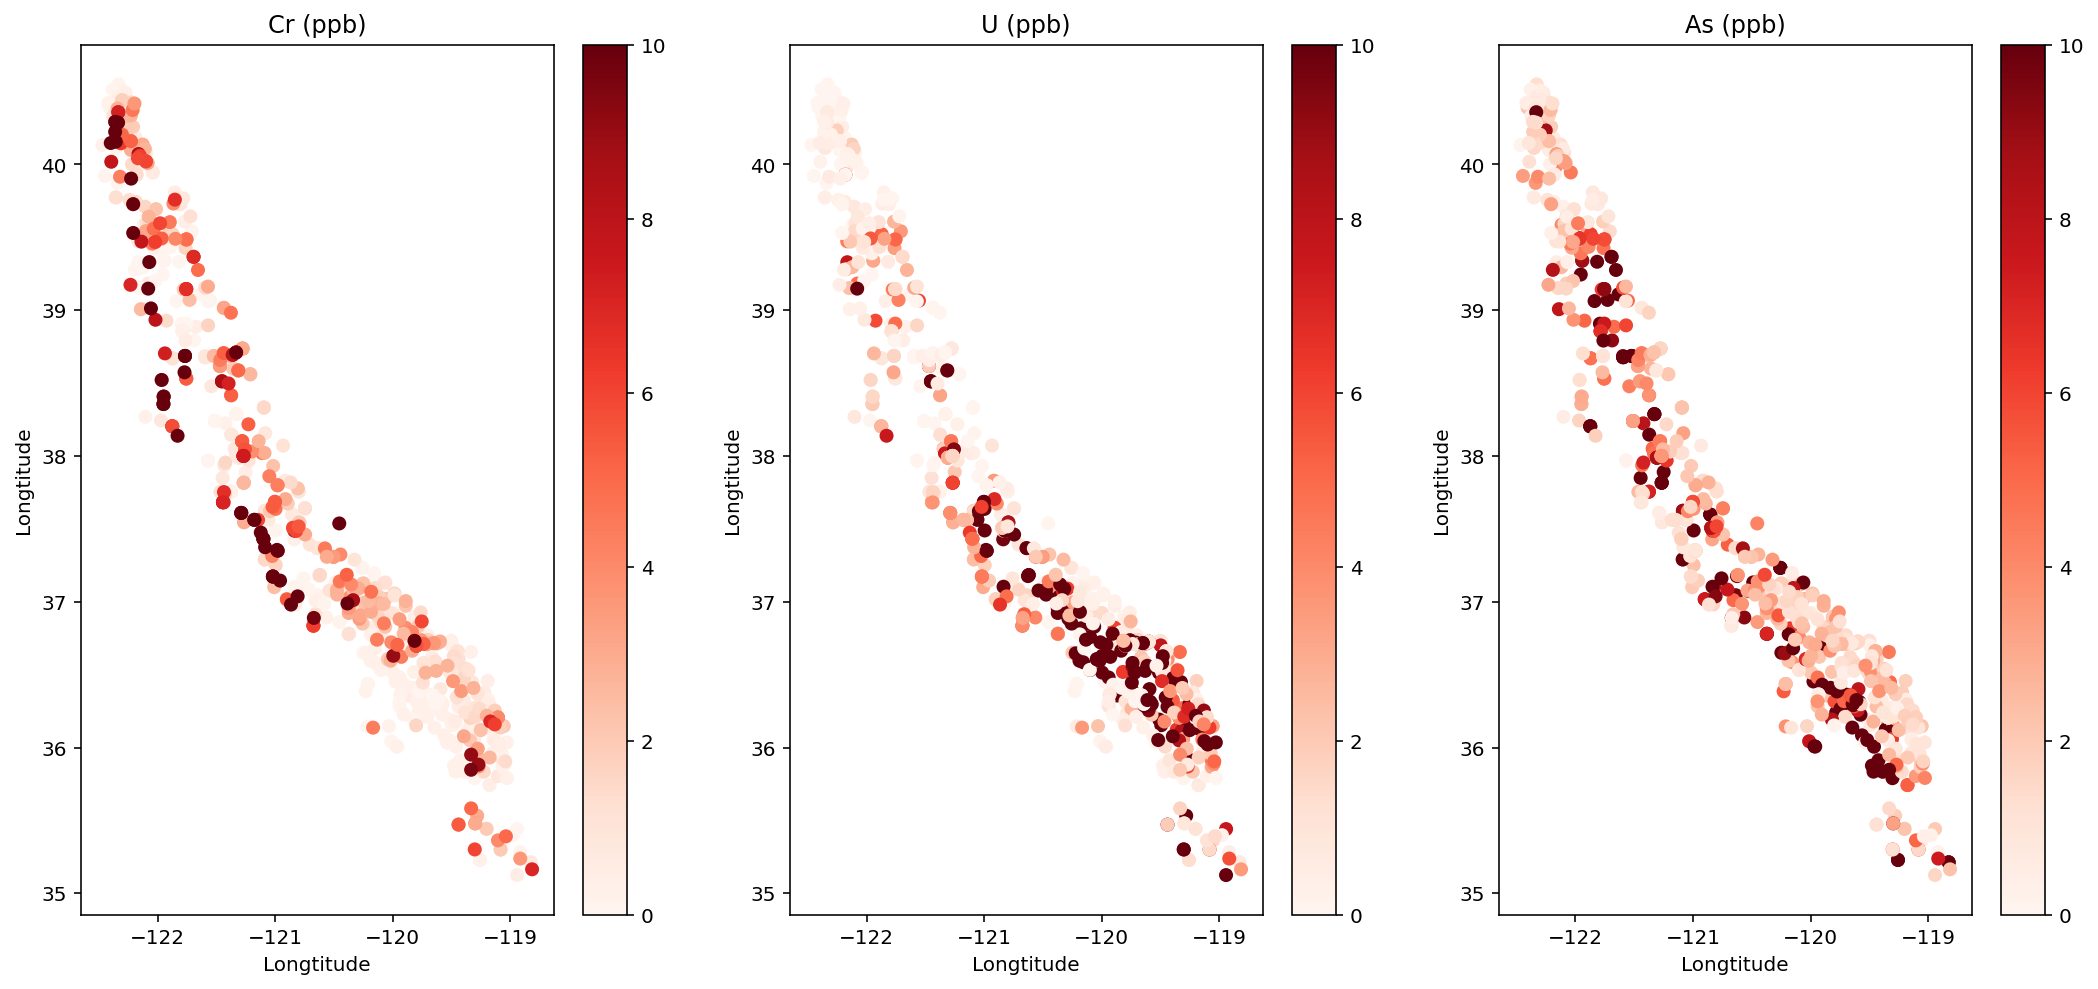

In [5]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (18,8))

plot1 = ax1.scatter(data['Longitude'],data['Latitude'],c = data['Cr (ppb)'],cmap = 'Reds',vmin = 0, vmax = 10)
plt.colorbar(plot1,ax=ax1)
ax1.set_xlabel('Longtitude')
ax1.set_ylabel('Longtitude')
ax1.set_title('Cr (ppb)')
plot2 = ax2.scatter(data['Longitude'],data['Latitude'],c = data['U (ppb)'],cmap = 'Reds',vmin = 0, vmax = 10)
plt.colorbar(plot2,ax=ax2)
ax2.set_xlabel('Longtitude')
ax2.set_ylabel('Longtitude')
ax2.set_title('U (ppb)')
plot3 =ax3.scatter(data['Longitude'],data['Latitude'],c = data['As (ppb)'],cmap = 'Reds',vmin = 0, vmax = 10)
plt.colorbar(plot3,ax=ax3)
ax3.set_xlabel('Longtitude')
ax3.set_ylabel('Longtitude')
ax3.set_title('As (ppb)')

## Scatter plot

Text(0, 0.5, 'Mn')

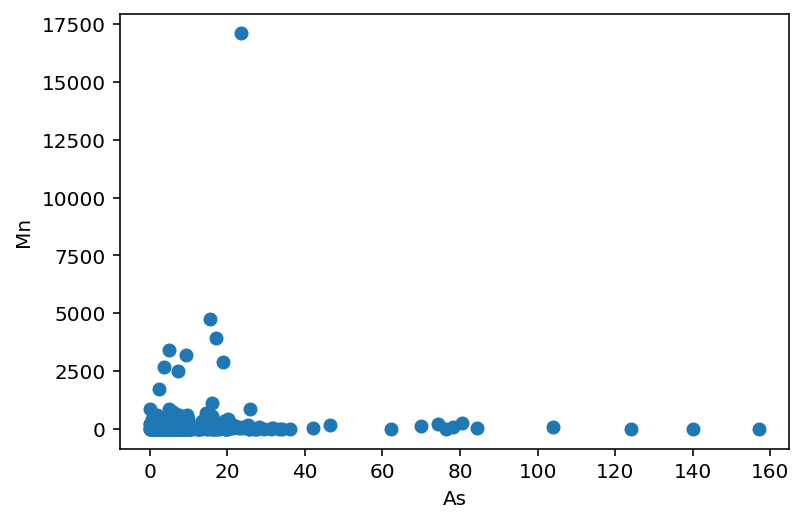

In [6]:
## Scatter plot before log-ratio

################################################
#Change compositions and name by yourself
################################################

composition1 = data['As (ppb)']
name1 = 'As'
composition2 = data['Mn (ppb)']
name2 = 'Mn'


plt.scatter(composition1,composition2)
plt.xlabel(name1)
plt.ylabel(name2)

Text(0, 0.5, 'log(Mn/NO3)')

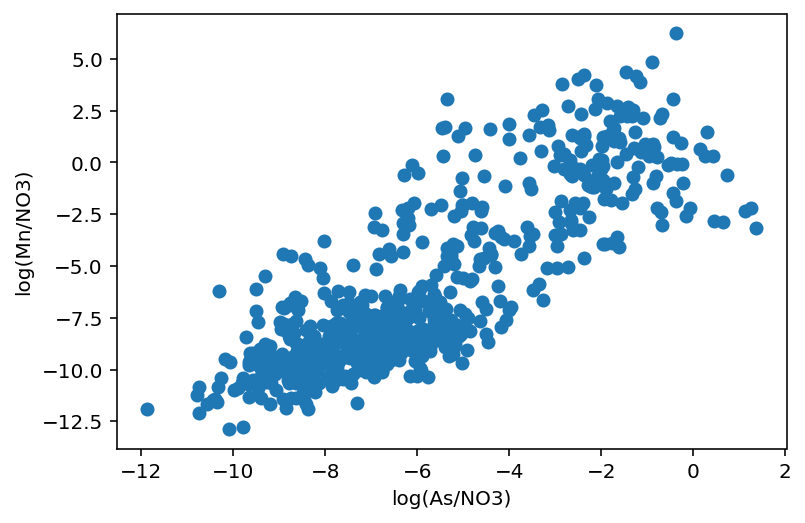

In [7]:
## Scatter plot after log-ratio

################################################
#Change log-ratios and name by yourself
################################################

log_ratio1 = np.log(data['As (ppb)']/data['NO3 (ppb)'])
name1 = 'log(As/NO3)'
log_ratio2 = np.log(data['Mn (ppb)']/data['NO3 (ppb)'])
name2 = 'log(Mn/NO3)'
plt.scatter(log_ratio1,log_ratio2)
plt.xlabel(name1)
plt.ylabel(name2)

## Make maps with an important log-ratio

Text(0.5, 1.0, 'log(As/NO3)')

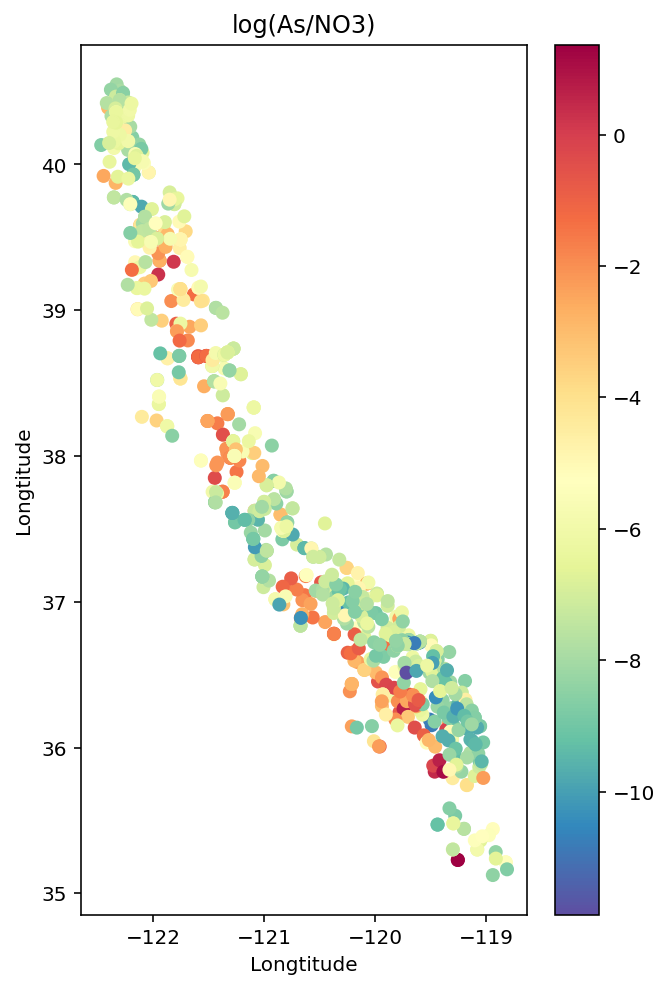

In [8]:
fig,ax = plt.subplots(1, 1, figsize = (5,8))

################################################
#Change log-ratios and its name by yourself
################################################

log_ratios = np.log(data['As (ppb)']/data['NO3 (ppb)'])
name = 'log(As/NO3)'

plot1 = ax.scatter(data['Longitude'],data['Latitude'], c = log_ratios,cmap = 'Spectral_r')
plt.colorbar(plot1,ax=ax)
ax.set_xlabel('Longtitude')
ax.set_ylabel('Longtitude')
ax.set_title(name)
